In [1]:
import os
import json
import pandas as pd
from src.vycisti import vycisti
from src.gender import gender
from src.tabulka import tabulka
from src.graf import graf
pd.set_option('display.max_columns', None)
df = pd.read_json(os.path.join("data", "filmy.json"))
with open(os.path.join("data_fixes", "opravy.json"), encoding="utf-8") as opravy:
    opravy = json.loads(opravy.read())
with open(os.path.join("data_fixes", "seznamy.json"), encoding="utf-8") as seznamy:
    seznamy = json.loads(seznamy.read())
with open(os.path.join("data_fixes", "zeny.json"), encoding="utf-8") as zeny:
    zeny = json.loads(zeny.read())
with open(os.path.join("data_fixes", "nelide.json"), encoding="utf-8") as nelide:
    nelide = json.loads(nelide.read())
df = vycisti(df, opravy)

2023/06/15 17:27:07 z 4555 řádků odstraněno 133. Aktuální dataframe má 4422 řádků.


In [2]:
hcf = df[df["Délka"] == "dlouhometrážní"].explode("Typologie")
hcf = hcf[hcf["Typologie"] == "hraný"]

In [3]:
dve_pohlavi = ["muž","žena"]

## Herectvo

In [4]:
hcfhraji = hcf[["Film","Copyright","Režie","Scénář","Původní filmový námět","Hrají","Typologie"]]

In [5]:
def hlrole(x):
    try:
        x = x[0]
    except:
        x = x
    return x

In [6]:
hcfhraji["Hlavní role"] = hcfhraji["Hrají"].apply(lambda x: hlrole(x))

C:\Users\micha\AppData\Local\Temp\ipykernel_18188\3404391821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hcfhraji["Hlavní role"] = hcfhraji["Hrají"].apply(lambda x: hlrole(x))


In [7]:
hcfhraji["Gender hlavní role"] = hcfhraji["Hlavní role"].apply(lambda x: gender(x, zeny, nelide))

C:\Users\micha\AppData\Local\Temp\ipykernel_18188\2976082911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hcfhraji["Gender hlavní role"] = hcfhraji["Hlavní role"].apply(lambda x: gender(x, zeny, nelide))


In [8]:
hcfhraji[["Film","Hlavní role","Gender hlavní role"]].sample(5)

,Film,Hlavní role,Gender hlavní role
2482,Holka na zabití (397068),Dagmar Veškrnová-Havlová (9688),žena
1301,Vstanou noví bojovníci (396113),Otomar Krejča (7597),muž
1246,Zelená knížka (396064),Eduard Linkers (21352),muž
954,Ducháček to zařídí (395841),Vlasta Burian (11992),muž
3563,Všechno nejlepší! (43219),Jan Dolanský (1091),muž


In [9]:
pomer_hl_roli = pd.Series(hcfhraji[hcfhraji["Gender hlavní role"] == "žena"].groupby("Copyright")["Hlavní role"].nunique() / hcfhraji[(hcfhraji["Gender hlavní role"] == "muž") | (hcfhraji["Gender hlavní role"] == "žena")].groupby("Copyright")["Hlavní role"].nunique())

<Axes: xlabel='Copyright'>

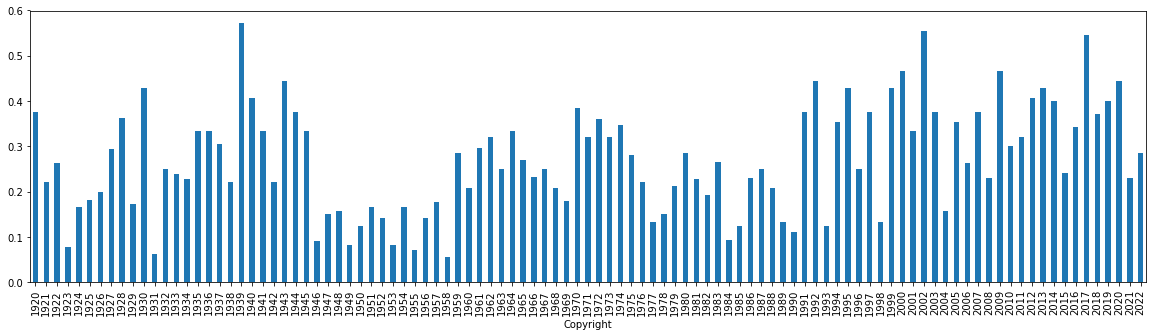

In [10]:
pomer_hl_roli.plot.bar(figsize=(20,5))

In [11]:
hcfhraji = hcfhraji.explode("Hrají")

In [12]:
hcfhraji["Gender"] = hcfhraji["Hrají"].apply(lambda x: gender(x, zeny, nelide))

In [13]:
def pomer_herecek(dataframe):
    pomer = pd.Series(dataframe[dataframe["Gender"] == "žena"].groupby("Film")["Hrají"].nunique().sum() / dataframe[(dataframe["Gender"] == "muž") | (dataframe["Gender"] == "žena")].groupby("Film")["Hrají"].nunique().sum())
    return pomer

In [14]:
herecky_celkem = pomer_herecek(hcfhraji)
herecky_celkem

0    0.306883
dtype: float64

In [15]:
herecky_7398 = pomer_herecek(hcfhraji[(hcfhraji["Copyright"]) >= 1973 & (hcfhraji["Copyright"] < 1999)])
herecky_7398

0    0.306883
dtype: float64

In [16]:
herecky_99 = pomer_herecek(hcfhraji[hcfhraji["Copyright"] >= 1999])
herecky_99

0    0.364441
dtype: float64

In [17]:
tempo = (herecky_99-herecky_7398) / 25
rok = 2010
podil = herecky_99
while float(podil) < 0.51:
    rok = rok + 1
    podil = podil + tempo
    if float(podil) > 0.49:
        print(f"{int(rok)}: {float(podil)}")

2065: 0.4910704442466935
2066: 0.4933727901985655
2067: 0.4956751361504375
2068: 0.4979774821023095
2069: 0.5002798280541815
2070: 0.5025821740060534
2071: 0.5048845199579254
2072: 0.5071868659097973
2073: 0.5094892118616693
2074: 0.5117915578135412


C:\Users\micha\AppData\Local\Temp\ipykernel_18188\3207822581.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  while float(podil) < 0.51:
C:\Users\micha\AppData\Local\Temp\ipykernel_18188\3207822581.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if float(podil) > 0.49:
C:\Users\micha\AppData\Local\Temp\ipykernel_18188\3207822581.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"{int(rok)}: {float(podil)}")


## Herectvo

In [18]:
herectvo = pd.read_json(os.path.join("data", "herectvo.json"))

In [19]:
herectvo

,Film,Role,Hraje,Mluví
0,Tábor padlých žen (10144),dr. Zikmund,Juraj Kukura,NaN
1,Tábor padlých žen (10144),Ernička,Dana Dinková,NaN
2,Tábor padlých žen (10144),velitel tábora,Štefan Kvietik (64266),NaN
3,Tábor padlých žen (10144),Manda,Hana Gregorová (2723),NaN
4,Tábor padlých žen (10144),Carmen,Henrieta Mičkovicová,NaN
...,...,...,...,...
108838,Baader Meinhof Komplex (99894),None,Carlo Ljubek (51017),NaN
108839,Baader Meinhof Komplex (99894),None,Pedro Stirner (51018),NaN
108840,Baader Meinhof Komplex (99894),None,Andreas Tobias (51019),NaN
108841,Baader Meinhof Komplex (99894),None,Leopold Hornung (51020),NaN


In [20]:
herectvo = herectvo.explode("Role")

In [21]:
herectvo["Hraje"].sample(10)

7389       František Bouška (17519)
85172     Šárka Štembergová (89419)
75525         Sylva Žáčková (34173)
72551       Karel Dellapina (35207)
29363    Antonín Holzinger (128491)
54889                   Jiří Hladký
83559         Jaroslav Tomsa (2576)
60439      Valerie Kaplanová (5168)
5547         Lucie Benešová (21914)
39521            Jan Pivec (127312)
Name: Hraje, dtype: object

In [22]:
persony = pd.read_json(os.path.join("data", "persony.json"))

In [23]:
herectvo = herectvo.merge(persony, left_on = "Hraje", right_on = "Jméno")

In [24]:
herectvo = herectvo.merge(df[["Film","Copyright"]], on="Film", how = "inner")

In [25]:
herectvo["Věk"] = herectvo["Copyright"] - herectvo["Rok narození"]

In [26]:
herectvo[herectvo["Věk"] < 1]

,Film,Role,Hraje,Mluví,Jméno,Id,Medailon,Osoba,Alternativní jména,Životopis,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí,Copyright,Věk
15951,Hvězda padá vzhůru (397037),ženich,Ivan Horák (2298),NaN,Ivan Horák (2298),2298,zvukař,fyzická,None,None,1977-11-01T00:00:00.000,"Praha, Československo",None,None,Praha,Československo,None,None,1977.0,NaN,1974,-3.0
15952,Hvězda padá vzhůru (397037),hudebník,Ivan Horák (2298),NaN,Ivan Horák (2298),2298,zvukař,fyzická,None,None,1977-11-01T00:00:00.000,"Praha, Československo",None,None,Praha,Československo,None,None,1977.0,NaN,1974,-3.0
76480,Babinský (395277),None,Ladislav Pech (131498),NaN,Ladislav Pech (131498),131498,"herec, divadelní režisér",fyzická,None,None,1966-10-21T00:00:00.000,"Praha, Rakouské císařství",1942-07-07T00:00:00.000,"Brno, Československo",Praha,Rakouské císařství,Brno,Československo,1966.0,1942.0,1922,-44.0


In [27]:
herectvo = herectvo[herectvo["Věk"] > 0]

In [28]:
persony.shape

(32664, 16)

In [29]:
herectvo.shape

(65857, 22)

In [30]:
herectvo[herectvo["Role"].str.lower().str.contains("princ",na=False)][["Hraje","Copyright","Role","Věk"]].sort_values(by="Věk",ascending=False).head(50)

,Hraje,Copyright,Role,Věk
61030,Ladislav Pešek (53326),1975,principál komediantů,69.0
69811,Marie Häusslerová (33648),1933,starší komorná princezny,67.0
28079,Martin Růžek (4934),1984,principál Fortunatus,66.0
45906,Theodor Pištěk (37366),1959,princův pobočník,64.0
70883,Antonín Bulík (130255),1938,princ Lobkovic,60.0
52114,Ludmila Vostrčilová (27337),1978,sekretářka Šprinclová,60.0
4502,Radovan Lukavský (3301),1976,"král všech moří, otec šesti princezen",57.0
44763,František Kubíček (87096),1971,sluha princátka,57.0
33035,Josef Kemr (4897),1978,"principál, otec Tončky",56.0
10710,Martin Štěpánek (5567),2001,vyslanec princezny,54.0


In [31]:
zanry = df[["Film","Žánr"]]

In [32]:
zanry

,Film,Žánr
0,Alarm staroměstských hasičů (401719),reportáž
1,Smích a pláč (395110),anekdota
2,Dostaveníčko ve mlýnici (395109),fraška
3,Žofínská plovárna (401718),reportáž
4,Voltýžování jízdního odboru Sokola pražského (...,"[reportáž, sportovní]"
...,...,...
4550,Zuza v zahradách (402223),dětský
4551,Mimi & Líza (402224),"[pohádka, povídkový]"
4552,Jan Žižka (402240),"[drama, historický, akční]"
4553,Idiot (402230),"[drama, záznam divadelní inscenace]"


In [33]:
zanry.explode("Žánr").groupby("Žánr")["Film"].nunique().nlargest(50)

Žánr
komedie              955
drama                635
psychologický        394
příběh               229
povídka              227
pohádka              218
reklamní             217
dětský               190
historický           162
melodrama            153
dokument             129
kriminální           118
etuda                110
hudební              107
životopisný          106
satira                93
dobrodružný           86
hořká komedie         78
groteska              77
povídkový             77
osvětový              71
reportáž              71
rodinný               68
politický             67
detektivní            66
sociální              65
tragikomedie          58
umělecký              58
válečný               49
fantastický           45
medailon              45
smutná komedie        43
poetický              41
thriller              41
časosběrný            41
podobenství           40
sportovní             40
esej                  39
propagační            39
road movie          

In [34]:
pohadky = ["pohádka","dětský","rodinný"]

In [35]:
herectvo = herectvo.merge(zanry, on="Film")

In [36]:
herectvo = herectvo.explode("Žánr")

In [37]:
herectvo[(herectvo["Role"].str.lower().str.contains("důchodce",na=True,regex=True))].groupby(["Jméno","Film","Role"])["Věk"].max().nsmallest(20)

Jméno                        Film                                 Role                                           
Lubomír Kostelka (841)       Přehlídce velím já! (396823)         invalidní důchodce Josef Rendl                     42.0
Luděk Pilc (128781)          Nikdo se nebude smát (396650)        elegantní důchodce                                 43.0
Josef Somr (1054)            Evžen mezi námi (397316)             důchodce Koutný                                    47.0
Martin Finger (19835)        Zahradnictví: Nápadník (401672)      invalidní důchodce Jindřich Rohn, Vilmin manžel    47.0
Ondřej Malý (59148)          Učitelka (400766)                    invalidní důchodce Řehák                           50.0
Josef Koza (126437)          Zlá noc (396978)                     důchodce Kverka, výpomocný zámečník                52.0
Josef Burda (78901)          Jakou barvu má láska (396997)        důchodce Mácha                                     53.0
Jan Kašpar (10009)           Vra

In [38]:
princove = pd.DataFrame(herectvo[(herectvo["Role"].str.lower().str.contains("princ[^\w]",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max())
princove.sort_values(by="Věk",ascending=False)

,,,Věk
Jméno,Film,Role,
Jiří Maryško (81150),Tajemství staré bambitky 2 (402174),"princ Oleandr, nápadník",41.0
Vladimír Zoubek (125641),O medvědu Ondřejovi (396371),princ Vítek,39.0
Petr Hanuš (3548),Třetí princ (397364),princ na koni,39.0
Miroslav Kalný (131466),O medvědu Ondřejovi (396371),princ nápadník,37.0
Soběslav Sejk (9018),O medvědu Ondřejovi (396371),princ Hynek,37.0
Miroslav Horníček (13266),Byl jednou jeden král... (396193),"princ krásný, syn Alabastra XVI.",36.0
Václav Neužil (9101),Sedmero krkavců (400594),princ Norbert,36.0
Jiří Bartoška (827),Třetí princ (397364),princ Jindřich,35.0
Ondřej Vetchý (836),Kouzelný měšec (8531),princ Velemír,34.0


In [39]:
herectvo[(herectvo["Role"].str.lower().str.contains("princ[^\w]",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().median()

30.0

In [40]:
herectvo[(herectvo["Role"].str.lower().str.contains("princ[^\w]",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().mean()

29.125

In [41]:
princezny = pd.DataFrame(herectvo[(herectvo["Role"].str.lower().str.contains("princezna",na=False,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().nlargest(20))
princezny

Věk
Jméno                     Film                                  Role                                      
Stella Májová (67287)     Byl jednou jeden král... (396193)     princezna Zpěvanka                    31.0
Jorga Kotrbová (125595)   Honza málem králem (397135)           princezna                             30.0
Květa Fialová (5338)      Princezna se zlatou hvězdou (396365)  princezna Florindella                 30.0
Irena Kačírková (81377)   Byl jednou jeden král... (396193)     princezna Drahomíra                   29.0
Libuše Šafránková (2272)  Třetí princ (397364)                  princezna Milena                      29.0
                                                                princezna ze skal                     29.0
Sabina Laurinová (3857)   Z pekla štěstí 2 (1201)               princezna Eufrozína                   29.0
Vlasta Fialová (5062)     Legenda o lásce (396257)              princezna Mechmene Banu               28.0
Sabina Laurinová (3857)   Z pekla štěstí (53139)                princezna Eufrozína                   27.0
Věra Benšová (127407)     Strakonický dudák (396214)            princezna Zulika, Aleonorosova dcera  26.0
Jitka Schneiderová (3264) Jezerní královna (150214)             princezna Odetta                      25.0
Alena Vránová (4984)      Hrátky s čertem (396261)              princezna Dišperanda                  24.0
Marie Kyselková (53291)   Princezna se zlatou hvězdou (396365)  princezna Lada, Hostivítova dcera     24.0
Aglaia Morávková (128888) O medvědu Ondřejovi (396371)          princezna Blanka                      23.0
Jana Kasanová (27344)     Tři zlaté vlasy děda Vševěda (396526) princezna                             23.0
Julie Jurištová (87459)   Deváté srdce (397210)                 princezna Adriena                     23.0
                          Princ a Večernice (397192)            princezna Helenka                     23.0
Libuše Šafránková (2272)  Malá mořská víla (397113)             princezna ze sousední říše            23.0
Magda Vášáryová (31019)   Princ Bajaja (396912)                 princezna Slavěna                     23.0
Taťána Čechovská (27546)  O statečném kováři (397412)           plavovlasá princezna                  23.0

In [42]:
len(princove[princove["Věk"] > princezny["Věk"].max()])

13

In [43]:
herectvo[(herectvo["Role"].str.lower().str.contains("princezna",na=False,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().median()

22.0

In [44]:
herectvo[(herectvo["Role"].str.lower().str.contains("princezna",na=False,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().mean()

22.536585365853657

In [45]:
herectvo.groupby("Jméno")["Věk"].max().nlargest()

Jméno
Jaroslav Hilbert (63466)      108.0
František Kovářík (126912)    104.0
Zdeněk Procházka (127279)     100.0
Zita Kabátová (839)            96.0
Miroslav Mráz (125568)         95.0
Name: Věk, dtype: float64

In [46]:
herectvo["Gender"] = herectvo["Jméno"].apply(lambda x: gender(x, zeny, nelide))

In [47]:
vyplneno = pd.Series(herectvo.groupby("Jméno")["Rok narození"].first(), name="vyplneno")
print(vyplneno[~vyplneno.isnull()].index.nunique())
print((vyplneno[vyplneno.isnull()].index.nunique()))

6497
0


In [48]:
distribuce = pd.DataFrame(herectvo.groupby(["Film","Copyright","Jméno","Věk","Gender"])["Rok úmrtí"].first().reset_index())

In [49]:
distribuce[distribuce["Rok úmrtí"].isnull()]

,Film,Copyright,Jméno,Věk,Gender,Rok úmrtí
0,"...A bílá bledla, až celkem ztmavla (397394)",1983,Dagmar Čárová (12058),25.0,žena,NaN
1,"...A bílá bledla, až celkem ztmavla (397394)",1983,Jiří Schwarz (1346),24.0,muž,NaN
3,"...A bílá bledla, až celkem ztmavla (397394)",1983,Lucie Žulová (58489),31.0,žena,NaN
4,"...A bílá bledla, až celkem ztmavla (397394)",1983,Marta Malá (129700),30.0,žena,NaN
5,"...A bílá bledla, až celkem ztmavla (397394)",1983,Martin Kubala (714),25.0,muž,NaN
...,...,...,...,...,...,...
64620,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Josef Engel (93365),28.0,muž,NaN
64628,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Karel Vítek (126651),34.0,muž,NaN
64629,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Kateřina Frýbová (88894),21.0,žena,NaN
64637,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Nora Krčmářová (128785),45.0,žena,NaN


In [50]:
distribuce

,Film,Copyright,Jméno,Věk,Gender,Rok úmrtí
0,"...A bílá bledla, až celkem ztmavla (397394)",1983,Dagmar Čárová (12058),25.0,žena,NaN
1,"...A bílá bledla, až celkem ztmavla (397394)",1983,Jiří Schwarz (1346),24.0,muž,NaN
2,"...A bílá bledla, až celkem ztmavla (397394)",1983,Karel Hovorka (76534),59.0,muž,1988.0
3,"...A bílá bledla, až celkem ztmavla (397394)",1983,Lucie Žulová (58489),31.0,žena,NaN
4,"...A bílá bledla, až celkem ztmavla (397394)",1983,Marta Malá (129700),30.0,žena,NaN
...,...,...,...,...,...,...
64645,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Vlastimil Hašek (35693),42.0,muž,1992.0
64646,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Blažek (126904),48.0,muž,1984.0
64647,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Kryzánek (81388),50.0,muž,1975.0
64648,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Srstka (7960),35.0,muž,2019.0


In [51]:
distribuce = distribuce[(distribuce["Rok úmrtí"] >= (distribuce["Copyright"] + 2)) | (distribuce["Rok úmrtí"].isnull())]

In [52]:
distribuce

,Film,Copyright,Jméno,Věk,Gender,Rok úmrtí
0,"...A bílá bledla, až celkem ztmavla (397394)",1983,Dagmar Čárová (12058),25.0,žena,NaN
1,"...A bílá bledla, až celkem ztmavla (397394)",1983,Jiří Schwarz (1346),24.0,muž,NaN
2,"...A bílá bledla, až celkem ztmavla (397394)",1983,Karel Hovorka (76534),59.0,muž,1988.0
3,"...A bílá bledla, až celkem ztmavla (397394)",1983,Lucie Žulová (58489),31.0,žena,NaN
4,"...A bílá bledla, až celkem ztmavla (397394)",1983,Marta Malá (129700),30.0,žena,NaN
...,...,...,...,...,...,...
64645,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Vlastimil Hašek (35693),42.0,muž,1992.0
64646,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Blažek (126904),48.0,muž,1984.0
64647,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Kryzánek (81388),50.0,muž,1975.0
64648,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Srstka (7960),35.0,muž,2019.0


In [53]:
distribuce[distribuce["Film"] == "Vlastníci (402008)"]

,Film,Copyright,Jméno,Věk,Gender,Rok úmrtí
54801,Vlastníci (402008),2019,Andrej Polák (10913),40.0,muž,NaN
54802,Vlastníci (402008),2019,Dagmar Havlová (76136),68.0,žena,NaN
54803,Vlastníci (402008),2019,David Novotný (1834),50.0,muž,NaN
54804,Vlastníci (402008),2019,Halka Třešňáková (24197),47.0,žena,NaN
54805,Vlastníci (402008),2019,Jiří Lábus (838),69.0,muž,NaN
54806,Vlastníci (402008),2019,Jiří Černý (13756),37.0,muž,NaN
54807,Vlastníci (402008),2019,Klára Melíšková (13764),48.0,žena,NaN
54808,Vlastníci (402008),2019,Kryštof Hádek (1830),37.0,muž,NaN
54809,Vlastníci (402008),2019,Ladislav Trojan (10040),87.0,muž,2022.0
54810,Vlastníci (402008),2019,Ondřej Malý (59148),53.0,muž,NaN


In [54]:
distribuce.groupby("Film")["Věk"].mean().nlargest(10)

Film
Pomalu, ale slábnu (78814)           86.500000
Panenství Lídy Baarové (400756)      83.000000
Ďábel (396930)                       82.000000
Kouzelná skříň (397535)              73.000000
Pátá loď (401180)                    72.000000
Pamětnice (123955)                   71.967742
Eva Nová (400704)                    70.333333
Prolog (7919)                        70.000000
Kuchyňské pohádky (400854)           69.000000
Tajemství pouze služební (400765)    66.368421
Name: Věk, dtype: float64

In [55]:
distribuce.groupby("Film")["Věk"].mean().nsmallest(10)

Film
Červená Karkulka (402180)                             5.00
Příušnice (400098)                                    6.00
Malý sen (396231)                                    13.00
Cesta do pravěku (396218)                            14.25
Československý Ježíšek (395161)                      15.00
Černý démant (398743)                                15.25
Jak Vašíček přišel k nohám (395247)                  17.00
Kino (396465)                                        17.00
Čo ja o tom viem alebo Záznam o sklamaní (396760)    17.00
Žalman aneb Naslouchám tichu Země (401765)           17.00
Name: Věk, dtype: float64

<Axes: ylabel='Frequency'>

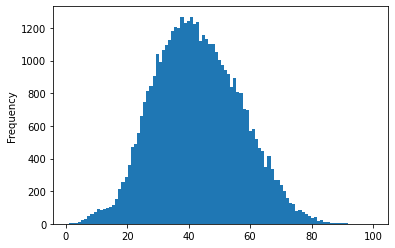

In [56]:
distribuce[distribuce["Gender"] == "muž"]["Věk"].plot.hist(bins=98)

In [57]:
vek_muzu = pd.Series(distribuce[distribuce["Gender"] == "muž"]["Věk"].value_counts().sort_index(), name="Věk mužů")
vek_muzu = vek_muzu.reindex(list(range(15,75)),fill_value=0)
vek_muzu.index = vek_muzu.index.astype(str)

In [58]:
vek_zen = pd.Series(distribuce[distribuce["Gender"] == "žena"]["Věk"].value_counts().sort_index(), name="Věk žen")
vek_zen = vek_zen.reindex(list(range(15,75)),fill_value=0)
vek_zen.index = vek_zen.index.astype(str)

In [59]:
vek_muzu25 = pd.Series(distribuce[(distribuce["Gender"] == "muž") & (distribuce["Copyright"] > 1998)]["Věk"].value_counts().sort_index(), name="Věk mužů (od r. 1999)")
vek_muzu25 = vek_muzu25.reindex(list(range(15,75)),fill_value=0)
vek_muzu25.index = vek_muzu25.index.astype(str)

In [60]:
vek_zen25 = pd.Series(distribuce[(distribuce["Gender"] == "žena") & (distribuce["Copyright"] > 1998)]["Věk"].value_counts().sort_index(), name="Věk žen (od r. 1999)")
vek_zen25 = vek_zen25.reindex(list(range(15,75)),fill_value=0)
vek_zen25.index = vek_zen25.index.astype(str)

In [153]:
graf(sloupcovy=[vek_zen, vek_muzu, vek_zen25, vek_muzu25], skryte=[vek_zen25, vek_muzu25], target="veky", titulek="Věk herců versus věk hereček", podtitulek="Do 24 let ženy ve filmech přečíslují muže, pak se z plátna začínají vytrácet. Zlom mezi gendery se v posledním čtvrtstoletí posunul na 27 let, za toto období je ale méně dat a jsou proto náchylnější ke zkreslení.", kredity=["Zdroj dat: Filmový přehled a Wikidata | Vizualizace: Michal Kašpárek, iROZHLAS.cz","https://www.irozhlas.cz/zpravy-tag/datova-zurnalistika"], osay="Počet rolí", skladany=False, histogram=True, barvy=["#fd7f6f", "#7eb0d5", "#FDCCE5", "#BEB9DB"])

Graf uložen.


In [62]:
distribuce[distribuce["Gender"] == "muž"]["Věk"]

1        24.0
2        59.0
5        25.0
6        25.0
8        45.0
         ... 
64645    42.0
64646    48.0
64647    50.0
64648    35.0
64649    50.0
Name: Věk, Length: 44818, dtype: float64

<Axes: ylabel='Frequency'>

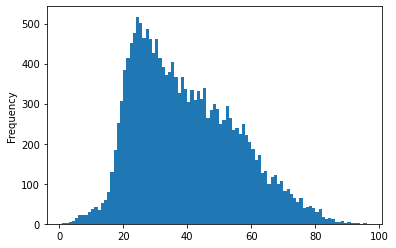

In [63]:
distribuce[distribuce["Gender"] == "žena"]["Věk"].plot.hist(bins=95)

In [64]:
distribuce[distribuce["Gender"] == "muž"]["Věk"].median()

42.0

In [65]:
distribuce[distribuce["Gender"] == "žena"]["Věk"].median()

36.0

In [66]:
distribuce[distribuce["Gender"] == "muž"]["Věk"].mode()

0    41.0
Name: Věk, dtype: float64

In [67]:
distribuce[distribuce["Gender"] == "žena"]["Věk"].mode()

0    24.0
Name: Věk, dtype: float64

In [68]:
distribuce[(distribuce["Copyright"] >= 2003) & (distribuce["Gender"] == "muž")]["Věk"].median()

45.0

In [69]:
distribuce[(distribuce["Copyright"] >= 2003) & (distribuce["Gender"] == "žena")]["Věk"].median()

41.0

<Axes: ylabel='Frequency'>

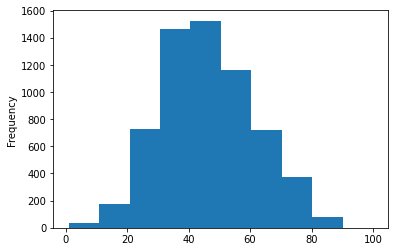

In [70]:
distribuce[(distribuce["Copyright"] >= 1998) & (distribuce["Gender"] == "muž")]["Věk"].plot.hist()

<Axes: ylabel='Frequency'>

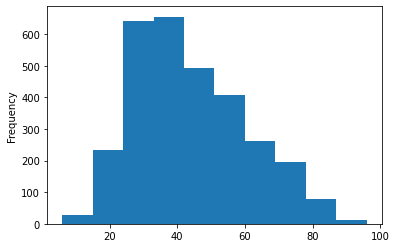

In [71]:
distribuce[(distribuce["Copyright"] >= 1998) & (distribuce["Gender"] == "žena")]["Věk"].plot.hist()

## Režisérstvo

In [72]:
reziserstvo = df[["Copyright","Typologie","Délka","Žánr","Film","Režie"]]

In [73]:
reziserstvo = reziserstvo.explode("Režie").explode("Typologie").explode("Délka")

In [74]:
reziserstvo["Gender"] = reziserstvo["Režie"].apply(lambda x: gender (x, zeny, nelide))

In [75]:
reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Copyright"] >= 2003)]

,Copyright,Typologie,Délka,Žánr,Film,Režie,Gender
3478,2003,dokumentární,dlouhometrážní,dokument,Ničeho nelituji (26300),Theodora Remundová (5425),žena
3478,2003,distribuční,dlouhometrážní,dokument,Ničeho nelituji (26300),Theodora Remundová (5425),žena
3479,2003,animovaný,krátkometrážní,komedie,Čapí film (25375),Denisa Grimmová (9607),žena
3479,2003,distribuční,krátkometrážní,komedie,Čapí film (25375),Denisa Grimmová (9607),žena
3479,2003,studentský,krátkometrážní,komedie,Čapí film (25375),Denisa Grimmová (9607),žena
...,...,...,...,...,...,...,...
4549,2022,distribuční,dlouhometrážní,medailon,Identita ES (402166),Alena Činčerová (5732),žena
4550,2022,animovaný,krátkometrážní,dětský,Zuza v zahradách (402223),Lucie Sunková (8767),žena
4550,2022,distribuční,krátkometrážní,dětský,Zuza v zahradách (402223),Lucie Sunková (8767),žena
4552,2022,hraný,dlouhometrážní,"[drama, historický, akční]",Jan Žižka (402240),Alice Hurychová (81624),žena


In [76]:
reziserstvo[(reziserstvo["Gender"] == "žena")]["Film"].nunique() / reziserstvo["Film"].nunique()

0.1013116236996834

In [77]:
reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Typologie"] == "hraný")]["Film"].nunique() / reziserstvo[(reziserstvo["Typologie"] == "hraný")]["Film"].nunique()

0.05626450116009281

In [78]:
reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Copyright"] >= 2003)]["Film"].nunique() / reziserstvo[(reziserstvo["Copyright"] >= 2003)]["Film"].nunique()

0.2378167641325536

In [79]:
reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Typologie"] == "hraný") & (reziserstvo["Copyright"] >= 2003)]["Film"].nunique() / reziserstvo[(reziserstvo["Copyright"] >= 2003) & (reziserstvo["Typologie"] == "hraný")]["Film"].nunique()

0.15257352941176472

<Axes: xlabel='Copyright'>

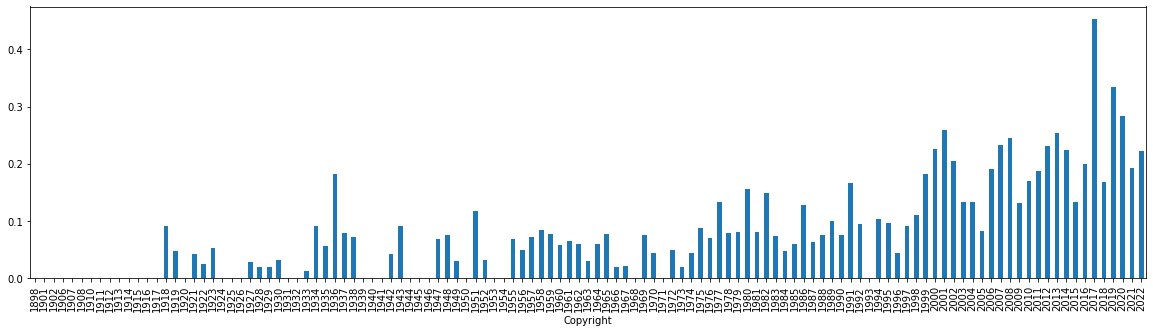

In [80]:
pomer_reziserek = pd.Series(reziserstvo[reziserstvo["Gender"] == "žena"].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum() / reziserstvo.groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum())
pomer_reziserek.plot.bar(figsize = (20,5))

<Axes: xlabel='Copyright'>

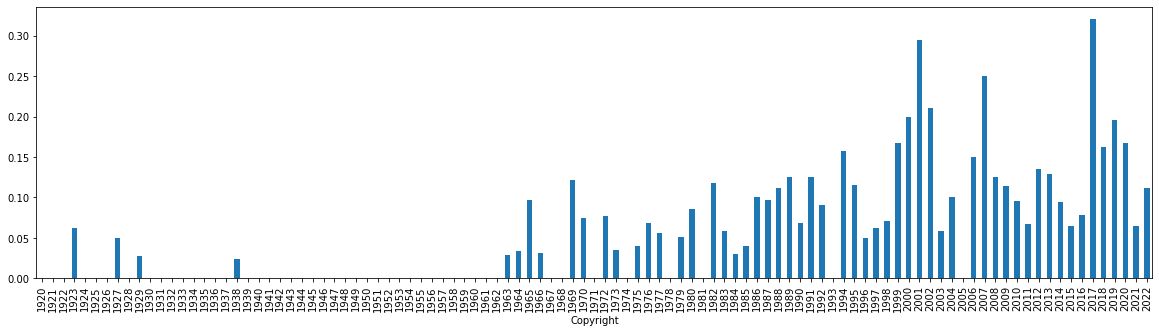

In [81]:
pomer_reziserek = pd.Series(reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Typologie"] == "hraný") & (reziserstvo["Délka"] == "dlouhometrážní")].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum() / reziserstvo[(reziserstvo["Typologie"] == "hraný") & (reziserstvo["Délka"] == "dlouhometrážní")].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum())
pomer_reziserek.plot.bar(figsize = (20,5))

In [82]:
reziserstvo[reziserstvo["Gender"] == "žena"].groupby("Režie")[["Copyright","Film","Typologie"]].min().sort_values(by="Copyright")

,Copyright,Film,Typologie
Režie,,,
Olga Rautenkranzová (80115),1918,Kozlonoh (395165),distribuční
Thea Červenková (73006),1919,Babička (395236),distribuční
Květoslava Semonická (128168),1927,Ve spárech upíra (395423),distribuční
Hermína Týrlová (4754),1928,Co jim schází? (398629),animovaný
Ada Pellová-Czivišová (55927),1929,Cikánská láska (395810),distribuční
...,...,...,...
Mária Pinčíková (122068),2021,Na značky! (402115),distribuční
Vera Lacková (105595),2021,Jak jsem se stala partyzánkou (402160),distribuční
Adéla Špaljová (3107),2021,Nebe (402085),distribuční


In [83]:
typy = reziserstvo["Typologie"].drop_duplicates().to_list()

In [84]:
for t in typy:
    try:
        mu = reziserstvo[(reziserstvo["Copyright"] >= 1998) & (reziserstvo["Typologie"] == t)].groupby("Gender")["Film"].nunique().iloc[0]
        ze = reziserstvo[(reziserstvo["Copyright"] >= 1998) & (reziserstvo["Typologie"] == t)].groupby("Gender")["Film"].nunique().iloc[1]
        print(f"""{t}: {ze/(ze+mu)}, m: {mu}, ž: {ze}""")
    except:
        print(f"""{t}: m: {mu}, ž: {ze}""")

dokumentární: 0.31733333333333336, m: 256, ž: 119
distribuční: 0.23076923076923078, m: 910, ž: 273
hraný: 0.15114503816793892, m: 556, ž: 99
animovaný: 0.36024844720496896, m: 103, ž: 58
studentský: 0.46923076923076923, m: 69, ž: 61
nedistribuční: m: 4, ž: 61
středometrážní: m: 4, ž: 61
krátkometrážní: 0.3, m: 7, ž: 3


<Axes: xlabel='Copyright'>

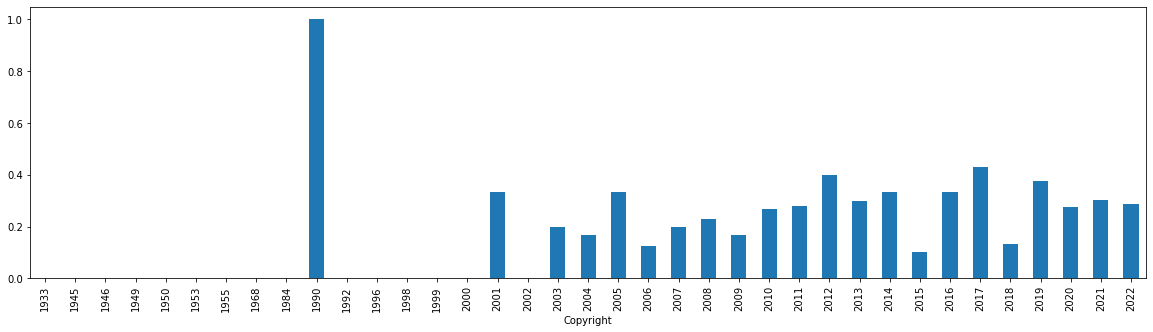

In [85]:
pomer_reziserek = pd.Series(reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Typologie"] == "dokumentární") & (reziserstvo["Délka"] == "dlouhometrážní")].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum() / reziserstvo[(reziserstvo["Typologie"] == "dokumentární") & (reziserstvo["Délka"] == "dlouhometrážní")].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum())
pomer_reziserek.plot.bar(figsize = (20,5))

## Různé profese

In [86]:
persony = pd.read_json(os.path.join("data", "persony.json"))

In [87]:
fyzicke = persony[persony["Osoba"] != "právní"]

In [88]:
def profesni_pomery(frame, persony, prvni=True):
    global nelide
    pomery = {}
    for p in seznamy["profese"]:
        df_pracovni = frame[["Film","Copyright",p]].explode(p)
        df_pracovni = df_pracovni.merge(persony[["Jméno","Osoba"]], left_on = p, right_on = "Jméno", how="outer")
        df_pracovni = df_pracovni[~df_pracovni["Jméno"].isin(nelide)]
        df_pracovni["Gender profese"] = df_pracovni[p].apply(lambda x: gender(x, zeny, nelide))
        stats = []
        stats.append(df_pracovni.groupby("Film")[p].nunique().sum())
        stats.append(df_pracovni[df_pracovni["Gender profese"] == "muž"].groupby("Film")[p].nunique().sum())
        stats.append(df_pracovni[df_pracovni["Gender profese"] == "žena"].groupby("Film")[p].nunique().sum())
        stats.append(df_pracovni[df_pracovni["Gender profese"] == "žena"].groupby("Film")[p].nunique().sum() / df_pracovni[df_pracovni["Gender profese"].isin(dve_pohlavi)].groupby("Film")[p].nunique().sum())
        if prvni:
            stats.append(df_pracovni[df_pracovni["Gender profese"] == "muž"]["Copyright"].min())
            stats.append(df_pracovni[df_pracovni["Gender profese"] == "žena"]["Copyright"].min())
        pomery[p] = stats
    pomery = pd.DataFrame.from_dict(pomery).transpose().rename(columns={0: "Celkem", 1: "Mužů", 2: "Žen", 3: "Podíl žen", 4: "První muž", 5: "První žena"})
    return pomery.sort_values(by="Podíl žen",ascending=False)

In [89]:
pp = profesni_pomery(df, fyzicke)
pp

,Celkem,Mužů,Žen,Podíl žen,První muž,První žena
Skript,1179.0,54.0,1125.0,0.954198,1944.0,1938.0
Asistent střihu,1532.0,185.0,1347.0,0.879243,1945.0,1945.0
Kostýmy,3786.0,656.0,3130.0,0.826730,1931.0,1931.0
Zástupce vedoucího produkce,397.0,107.0,290.0,0.730479,1991.0,1991.0
Návrhy kostýmů,2027.0,745.0,1282.0,0.632462,1922.0,1932.0
Asistent vedoucího produkce,722.0,335.0,387.0,0.536011,1992.0,1952.0
Produkce,1365.0,684.0,681.0,0.498901,1935.0,1954.0
Masky,5226.0,2802.0,2423.0,0.463732,1926.0,1945.0
Vedoucí produkce,1162.0,656.0,506.0,0.435456,1991.0,1993.0
České podtitulky,184.0,113.0,70.0,0.382514,1996.0,1936.0


In [90]:
pp["Zpoždění"] = pp["První žena"] - pp["První muž"]
pp.sort_values(by="Zpoždění",ascending=False)

,Celkem,Mužů,Žen,Podíl žen,První muž,První žena,Zpoždění
Hudba k písni,42.0,40.0,2.0,0.047619,1933.0,2003.0,70.0
Hudební režie,167.0,151.0,16.0,0.095808,1933.0,2002.0,69.0
Dirigent,132.0,126.0,6.0,0.045455,1932.0,2000.0,68.0
Výběr hudby,44.0,42.0,2.0,0.045455,1945.0,2010.0,65.0
Druhá kamera,2059.0,2017.0,42.0,0.020398,1913.0,1974.0,61.0
Asistent zvuku,522.0,482.0,40.0,0.076628,1932.0,1992.0,60.0
Zvláštní efekty,791.0,769.0,6.0,0.007742,1928.0,1983.0,55.0
Asistent kamery,3891.0,3817.0,68.0,0.017503,1919.0,1972.0,53.0
Producent,2900.0,2169.0,729.0,0.251553,1939.0,1991.0,52.0
Autor projektu,27.0,22.0,5.0,0.185185,1967.0,2017.0,50.0


In [91]:
profesni_pomery(hcf, fyzicke)

,Celkem,Mužů,Žen,Podíl žen,První muž,První žena
Skript,1059.0,41.0,1018.0,0.961284,1944.0,1938.0
Asistent střihu,1317.0,116.0,1201.0,0.911921,1965.0,1945.0
Kostýmy,3542.0,619.0,2923.0,0.825240,1931.0,1931.0
Zástupce vedoucího produkce,305.0,90.0,215.0,0.704918,1991.0,1991.0
Návrhy kostýmů,1859.0,695.0,1164.0,0.626143,1922.0,1932.0
Asistent vedoucího produkce,439.0,220.0,219.0,0.498861,1992.0,1991.0
Produkce,621.0,327.0,294.0,0.473430,1981.0,1992.0
Masky,4839.0,2593.0,2245.0,0.464035,1926.0,1945.0
Vedoucí produkce,739.0,428.0,311.0,0.420839,1991.0,1993.0
Účinkují,43.0,25.0,18.0,0.418605,1998.0,2003.0


In [92]:
profesni_pomery(df[df["Copyright"] >= 1998], fyzicke, prvni=False)

,Celkem,Mužů,Žen,Podíl žen
Skript,265.0,40.0,225.0,0.849057
Kostýmy,896.0,139.0,757.0,0.844866
Návrhy kostýmů,708.0,159.0,549.0,0.775424
Zástupce vedoucího produkce,346.0,81.0,265.0,0.765896
Asistent vedoucího výroby,4.0,1.0,3.0,0.750000
Masky,1476.0,407.0,1068.0,0.724068
Assistent architekta,109.0,47.0,62.0,0.568807
Zástupce vedoucího výroby,183.0,79.0,104.0,0.568306
Asistent vedoucího produkce,687.0,321.0,366.0,0.532751
Dialogy české verze,25.0,12.0,13.0,0.520000


In [93]:
hcf25 = profesni_pomery(hcf[hcf["Copyright"] >= 1998], fyzicke, prvni=False)
hcf25 = hcf25[hcf25["Celkem"] >= 100]

C:\Users\micha\AppData\Local\Temp\ipykernel_18188\2156053058.py:13: RuntimeWarning: invalid value encountered in scalar divide
  stats.append(df_pracovni[df_pracovni["Gender profese"] == "žena"].groupby("Film")[p].nunique().sum() / df_pracovni[df_pracovni["Gender profese"].isin(dve_pohlavi)].groupby("Film")[p].nunique().sum())


In [94]:
chciukazat = ['Skript',
              'Asistent režie',
              'Režie',
              'Produkce',
 'Kamera',
 'Původní filmový námět',
 'Scénář',
 'Dramaturg',
 'Střih',
 'Hrají',
 'Zvuk',
             'Koordinátor kaskadérů']

In [95]:
len(chciukazat)

12

In [96]:
zeny25hcf = pd.Series(hcf25["Podíl žen"])
zeny25hcf = zeny25hcf[zeny25hcf.index.isin(chciukazat)]

In [97]:
zeny25hcf

Skript                   0.878661
Produkce                 0.481034
Hrají                    0.365603
Asistent režie           0.276808
Dramaturg                0.241963
Scénář                   0.182737
Původní filmový námět    0.170213
Režie                    0.131298
Střih                    0.102351
Zvuk                     0.066168
Kamera                   0.010013
Koordinátor kaskadérů    0.003559
Name: Podíl žen, dtype: float64

In [98]:
muzi25hcf = pd.Series(1 - zeny25hcf, name="Podíl mužů")

In [99]:
muzi25hcf

Skript                   0.121339
Produkce                 0.518966
Hrají                    0.634397
Asistent režie           0.723192
Dramaturg                0.758037
Scénář                   0.817263
Původní filmový námět    0.829787
Režie                    0.868702
Střih                    0.897649
Zvuk                     0.933832
Kamera                   0.989987
Koordinátor kaskadérů    0.996441
Name: Podíl mužů, dtype: float64

In [100]:
graf(vodorovny=[muzi25hcf,zeny25hcf], procenta=[muzi25hcf,zeny25hcf], target="podilygender", titulek="Zastoupení žen ve vybraných profesích", podtitulek="Statistika zachycuje české celovečerní hrané filmy posledních 25 let.", kredity=["Zdroj dat: Filmový přehled | Vizualizace: Michal Kašpárek, iROZHLAS.cz","https://www.irozhlas.cz/zpravy-tag/datova-zurnalistika"], osay=" ", osay2 = " ", skladany=True,  barvy=["#7eb0d5","#fd7f6f"])

Graf uložen.


In [101]:
def prvnizeny(frame, persony):
    global nelide
    pomery = {}
    for p in seznamy["profese"]:
        df_pracovni = frame[["Film","Copyright",p]].explode(p)
        df_pracovni["Gender profese"] = df_pracovni[p].apply(lambda x: gender(x, zeny, nelide))
        prvni_rok = df_pracovni[df_pracovni["Gender profese"] == "žena"]["Copyright"].min()
        prvni_zeny = df_pracovni[(df_pracovni["Gender profese"] == "žena") & (df_pracovni["Copyright"] == prvni_rok)]
        print(f"""{p.upper()}:\n{prvni_zeny.drop(columns=["Gender profese"])}\n***""")

In [102]:
prvnizeny(df, persony)

ANIMACE:
                                           Film  Copyright  \
341             Poučení kocoura Felixe (398493)       1927   
342  Nové dobrodružství kocoura Felixe (398492)       1927   
343              Nehoda Kocoura Felixe (398491)       1927   

                    Animace  
341  Hermína Týrlová (4754)  
342  Hermína Týrlová (4754)  
343  Hermína Týrlová (4754)  
***
ARCHITEKT:
                        Film  Copyright                Architekt
1857  Ivana v útoku (396522)       1963  Marta Kaplerová (65806)
***
ASISTENT KAMERY:
                Film  Copyright Asistent kamery
2337  Ďábel (396930)       1972  Zuzana Švábová
***
ASISTENT REŽIE:
                                Film  Copyright            Asistent režie
678  Žena, která ví co chce (395636)       1934  Gill Sedláčková (128625)
***
ASISTENT STŘIHU:
                        Film  Copyright             Asistent střihu
1146  Z růže kvítek (396004)       1945      Marie Huberová-Brožová
1147    Řeka čaruje (396006)       

SPOLUPRÁCE:
                                                  Film  Copyright  \
275  Vizte vše, co tropí dnes kluci dva a jeden pes...       1925   

                 Spolupráce  
275  Hermína Týrlová (4754)  
***
STŘIH:
                      Film  Copyright                   Střih
461  Černý plamen (395502)       1930  Marie Bourová (127330)
***
TECHNICKÝ SCÉNÁŘ:
                           Film  Copyright             Technický scénář
1346  Písnička za groš (396150)       1952  Jindřiška Höferová (128029)
***
TRIKY:
                               Film  Copyright          Triky
1411  Obušku, z pytle ven! (396215)       1955  Milada Veselá
***
VEDOUCÍ PRODUKCE:
                                     Film  Copyright          Vedoucí produkce
3168  Konec básníků v Čechách... (397729)       1993  Daniela Stašková (34813)
3168  Konec básníků v Čechách... (397729)       1993   Zdenka Deitchová (1143)
3168  Konec básníků v Čechách... (397729)       1993          Zdenka Deitchová
3174           

In [103]:
prvnizeny(hcf, persony)

ANIMACE:
                     Film  Copyright                    Animace
3113  Motýlí čas (397655)       1990  Vlasta Pospíšilová (4386)
***
ARCHITEKT:
                        Film  Copyright                Architekt
1857  Ivana v útoku (396522)       1963  Marta Kaplerová (65806)
***
ASISTENT KAMERY:
                                 Film  Copyright          Asistent kamery
3218  Artuš, Merlin a Prchlíci (7395)       1995  Lenka Dimitrovová (863)
***
ASISTENT REŽIE:
                                Film  Copyright            Asistent režie
678  Žena, která ví co chce (395636)       1934  Gill Sedláčková (128625)
***
ASISTENT STŘIHU:
                        Film  Copyright             Asistent střihu
1146  Z růže kvítek (396004)       1945      Marie Huberová-Brožová
1147    Řeka čaruje (396006)       1945  Jarmila Müllerová (129635)
1147    Řeka čaruje (396006)       1945    Marie Tillerová (130320)
***
ASISTENT VEDOUCÍHO PRODUKCE:
                         Film  Copyright Asistent vedou

NÁVRHY KOSTÝMŮ:
                           Film  Copyright                     Návrhy kostýmů
528  Zapadlí vlastenci (395561)       1932  Anna Suchardová-Brichová (128374)
532      Mizející svět (395558)       1932            Marta Úlehlová (125057)
***
NÁVRHY TITULKŮ:
                                           Film  Copyright  \
1927  Limonádový Joe aneb Koňská opera (396598)       1964   

                Návrhy titulků  
1927  Vlasta Jelínková (61428)  
***
ODBORNÝ PORADCE:
                       Film  Copyright           Odborný poradce
532  Mizející svět (395558)       1932    Anna Klusáková (76633)
532  Mizející svět (395558)       1932  Vlasta Zemanová (105095)
532  Mizející svět (395558)       1932            Anna Klusáková
532  Mizející svět (395558)       1932           Vlasta Zemanová
***
PEDAGOGICKÉ VEDENÍ:
                          Film  Copyright         Pedagogické vedení
3314  Rychlé pohyby očí (9168)       1998  Drahomíra Vihanová (2076)
***
POMOCNÁ REŽIE:
            

## Věk

(Moc to nevypovídá, u řady profesí je málo dat.)

In [104]:
def vek(dataframe, persony, filtr):
    global p
    vek = {}
    for p in seznamy["profese"]:
        df_pracovni = dataframe.explode("Typologie")
        df_pracovni = df_pracovni[(df_pracovni["Typologie"] == "hraný") & (df_pracovni["Délka"] == "dlouhometrážní")]
        df_pracovni = df_pracovni[df_pracovni["Copyright"] >= 1998][["Film","Copyright",p]].explode(p)
        df_pracovni = df_pracovni.merge(persony, left_on = p, right_on = "Jméno")
        df_pracovni = df_pracovni[df_pracovni["Osoba"] == "fyzická"]
        df_pracovni["Věk"] = df_pracovni["Copyright"] - df_pracovni["Rok narození"]
        df_pracovni = df_pracovni[~(df_pracovni["Rok úmrtí"] < df_pracovni["Copyright"])]
        vek[p] = [df_pracovni["Věk"].median(), df_pracovni["Věk"].mean(), df_pracovni["Věk"].min(), df_pracovni["Věk"].max(), df_pracovni[p].nunique()]
    vek = pd.DataFrame.from_dict(vek).transpose().rename(columns={0: "Medián", 1: "Průměr", 2: "Nejnižší", 3: "Nejvyšší", 4: "n"})
    return vek[vek["n"] > filtr].sort_values(by="Medián",ascending=False)

In [105]:
vek(df, fyzicke, 20)

,Medián,Průměr,Nejnižší,Nejvyšší,n
Skript,64.0,55.000000,24.0,71.0,27.0
Odborný poradce,57.0,56.088235,27.0,91.0,237.0
Dramaturg,56.0,55.207627,22.0,88.0,237.0
Koordinátor kaskadérů,55.0,54.479381,27.0,72.0,41.0
Pedagogické vedení,54.0,56.442857,33.0,82.0,40.0
Masky,54.0,52.087432,21.0,76.0,193.0
Triky,51.0,49.338983,21.0,67.0,56.0
Komentář,50.5,50.538462,22.0,81.0,59.0
Výkonná produkce,50.0,47.945055,22.0,82.0,225.0
Kaskadéři,48.0,48.265487,22.0,73.0,287.0


In [106]:
vek(df[df["Copyright"] > 1998], fyzicke, 150)

,Medián,Průměr,Nejnižší,Nejvyšší,n
Odborný poradce,59.0,58.050000,28.0,91.0,219.0
Dramaturg,56.0,55.386957,22.0,88.0,228.0
Masky,54.0,52.332394,21.0,76.0,189.0
Výkonná produkce,50.0,47.945055,22.0,82.0,225.0
Kaskadéři,49.0,48.878882,24.0,73.0,277.0
Návrhy kostýmů,48.0,48.377953,22.0,81.0,182.0
Architekt,47.0,47.788382,25.0,79.0,165.0
Mluví,47.0,46.274869,9.0,89.0,490.0
"Hudba, text a zpěv písně",46.0,47.617591,9.0,93.0,1258.0
Kamera,45.0,46.210412,19.0,77.0,224.0


In [107]:
rezie = df[["Film","Copyright","Režie","Typologie","Délka"]].explode("Režie").explode("Typologie")
rezie = rezie[(rezie["Typologie"] == "hraný") & (rezie["Délka"] == "dlouhometrážní")]

In [108]:
rezie = rezie.merge(persony[["Jméno","Rok narození"]], left_on = "Režie", right_on = "Jméno")

In [109]:
rezie["Věk"] = rezie["Copyright"] - rezie["Rok narození"]

In [110]:
rezie = rezie.drop_duplicates()

<Axes: xlabel='Copyright'>

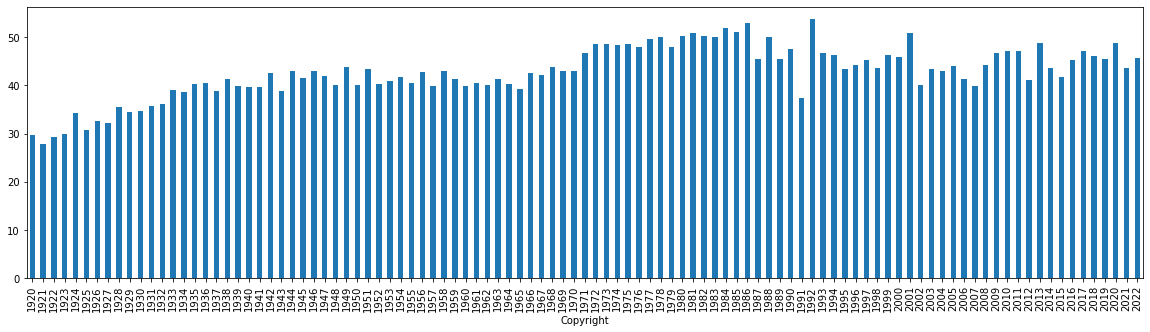

In [111]:
rezie.groupby("Copyright")["Věk"].mean().plot.bar(figsize=(20,5))

In [112]:
nejmladsi_reziseri = rezie.groupby("Copyright")["Věk"].min()

In [113]:
nejmladsi_reziseri[nejmladsi_reziseri >= 30]

Copyright
1934    32.0
1935    32.0
1942    31.0
1943    30.0
1945    32.0
1953    31.0
1955    31.0
1957    30.0
1960    30.0
1962    32.0
1968    30.0
1969    30.0
1971    32.0
1972    35.0
1973    34.0
1974    35.0
1975    30.0
1976    31.0
1977    32.0
1978    34.0
1980    30.0
1982    30.0
1983    30.0
1984    31.0
1985    31.0
1986    32.0
1987    30.0
1988    31.0
1990    31.0
2000    31.0
2001    32.0
2003    32.0
2020    30.0
2022    32.0
Name: Věk, dtype: float64

In [114]:
rezie[(rezie["Věk"] < 30) & (rezie["Copyright"].isin(range(1960,1991)))]

,Film,Copyright,Režie,Typologie,Délka,Jméno,Rok narození,Věk
1299,Uprchlík (396433),1961,Herrmann Zschoche (129164),hraný,dlouhometrážní,Herrmann Zschoche (129164),1934.0,27.0
1375,Křik (396542),1963,Jaromil Jireš (5317),hraný,dlouhometrážní,Jaromil Jireš (5317),1935.0,28.0
1393,Máte doma lva? (396539),1963,Pavel Hobl (7876),hraný,dlouhometrážní,Pavel Hobl (7876),1935.0,28.0
1394,Za pět minut sedm (396581),1964,Pavel Hobl (7876),hraný,dlouhometrážní,Pavel Hobl (7876),1935.0,29.0
1434,Démanty noci (396605),1964,Jan Němec (3041),hraný,dlouhometrážní,Jan Němec (3041),1936.0,28.0
1454,Místenka bez návratu (396596),1964,Dušan Klein (2568),hraný,dlouhometrážní,Dušan Klein (2568),1939.0,25.0
1478,Místenka bez návratu (396596),1964,Miroslav Sobota (54046),hraný,dlouhometrážní,Miroslav Sobota (54046),1935.0,29.0
1518,Nikdo se nebude smát (396650),1965,Hynek Bočan (2947),hraný,dlouhometrážní,Hynek Bočan (2947),1938.0,27.0
1519,Soukromá vichřice (396727),1967,Hynek Bočan (2947),hraný,dlouhometrážní,Hynek Bočan (2947),1938.0,29.0
1536,Ostře sledované vlaky (396694),1966,Jiří Menzel (7887),hraný,dlouhometrážní,Jiří Menzel (7887),1938.0,28.0


## Mluveno

In [115]:
mluveno = df.explode("Mluveno")

In [116]:
mluveno["Mluveno"].drop_duplicates().to_list()

['bez dialogů',
 'česky',
 'německy',
 'francouzsky',
 'anglicky',
 'komentář',
 'slovensky',
 'polsky',
 'rusínsky',
 'jidiš',
 'zpíváno',
 'maďarsky',
 'latinsky',
 'srbochorvatsky',
 'inuitsky',
 'rusky',
 'italsky',
 'hebrejsky',
 'čínsky',
 'tibetsky',
 'vietnamsky',
 'korejsky',
 'španělsky',
 'nizozemsky',
 'indonésky',
 'romsky',
 'portugalsky',
 'japonsky',
 'mongolsky',
 'bulharsky',
 'khmersky',
 'švédsky',
 'turecky',
 'ukrajinsky',
 None,
 'lotyšsky',
 'makedonsky',
 'řecky',
 'staroslověnsky',
 'fiktivním jazykem bandungštinou',
 'znakovou řečí',
 'finsky',
 'islandsky',
 'ázerbájdžánsky',
 'fiktivním jazyjkem',
 'šarišsky',
 'dánsky',
 'arménsky',
 'slovinsky',
 'albánsky',
 'chorvatsky',
 'srbsky',
 'rumunsky',
 'bosensky',
 'arabsky',
 'moldavsky',
 'nepálsky',
 'somálsky',
 'oromsky',
 'fiktivním jazykem aporverštinou',
 'navažsky',
 'bengálsky',
 'slezsky',
 'rwandsky',
 'svahilsky',
 'gruzínsky',
 'sámsky',
 'umělým jazykem mezislovanštinou',
 'hindsky',
 'persky',


<Axes: xlabel='Copyright'>

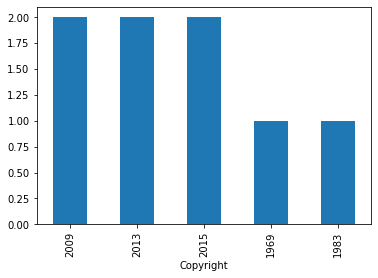

In [117]:
mluveno[mluveno["Mluveno"] == "romsky"].groupby("Copyright")["Film"].nunique().nlargest().plot.bar()

In [118]:
mluveno[mluveno["Mluveno"] == "romsky"][["Film","Copyright"]].sort_values(by="Copyright")

,Film,Copyright
2161,Skřivánci na niti (396810),1969
2828,Radikální řez (397408),1983
3329,Černobílá v barvě (53571),1999
3362,Zpráva o putování studentů Petra a Jakuba (16884),2000
3581,Iné svety (45546),2006
3692,Ulovit miliardáře (118291),2009
3704,El Paso (65979),2009
3811,Cigán (166202),2011
3871,Až do města Aš (190372),2012
3921,Vojta Lavička: Nahoru a dolů (103360),2013


<Axes: xlabel='Copyright'>

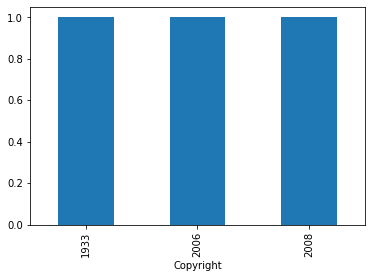

In [119]:
mluveno[mluveno["Mluveno"] == "rusínsky"].groupby("Copyright")["Film"].nunique().nlargest().plot.bar()

<Axes: xlabel='Copyright'>

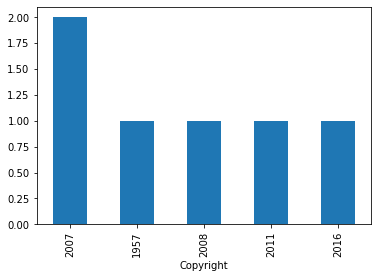

In [120]:
mluveno[mluveno["Mluveno"] == "vietnamsky"].groupby("Copyright")["Film"].nunique().nlargest().plot.bar()

## Rodiště

In [121]:
persony = pd.read_json(os.path.join("data", "persony.json"))

In [122]:
persony[persony["Osoba"] == "fyzická"].shape

(29664, 16)

In [123]:
persony[~persony["Město narození"].isnull()].shape

(8573, 16)

In [124]:
persony[(persony["Osoba"] == "fyzická") & (~persony["Město narození"].isnull())].shape

(8573, 16)

In [125]:
persony[persony["Město narození"] == "Praha"].shape

(3094, 16)

### Kontrola

In [126]:
persony[persony["Město narození"] == "Praha"].sample(10)

,Jméno,Id,Medailon,Osoba,Alternativní jména,Životopis,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí
2948,Marie Karpfingerová (123307),123307,herečka,fyzická,Marie Týkačová (provdaná),None,1895-09-15T00:00:00.000,"Praha, Rakousko-Uhersko",19??,None,Praha,Rakousko-Uhersko,None,None,1895.0,19.0
2277,Dagmar Lehovcová (120436),120436,herečka,fyzická,None,None,1922-06-16T00:00:00.000,"Praha, Československo",19??,None,Praha,Československo,None,None,1922.0,19.0
31530,Dagmar Felixová (92198),92198,"herečka, spisovatelka, pedagožka",fyzická,Dagmar Bahníková (provdaná),None,1930-03-08T00:00:00.000,"Praha, Československo",2022-04-09T00:00:00.000,"Hradec Králové, Česká republika",Praha,Československo,Hradec Králové,Česká republika,1930.0,2022.0
27806,Miloslav Štibich (82053),82053,"herec, inspicient",fyzická,None,None,1928-08-25T00:00:00.000,"Praha, Československo",1992-06-22T00:00:00.000,"Praha, Československo",Praha,Československo,Praha,Československo,1928.0,1992.0
31851,Daniel Landa (9310),9310,"herec, hudební skladatel",fyzická,kouzelník Žito 44 (pseudonym),None,1968-11-04T00:00:00.000,"Praha, Československo",None,None,Praha,Československo,None,None,1968.0,NaN
7375,Jiří Rebec (129437),129437,"choreograf, tanečník",fyzická,None,None,1942-12-21T00:00:00.000,"Praha, Československo",None,None,Praha,Československo,None,None,1942.0,NaN
481,Václav Vorlíček (1044),1044,"scenárista, pedagog, režisér",fyzická,None,"VÁCLAV VORLÍČEK (nar. 3.6.1930, Praha – zem. 5...",1930-06-03T00:00:00.000,"Praha, Československo",2019-02-05T00:00:00.000,"Praha, Česká republika",Praha,Československo,Praha,Česká republika,1930.0,2019.0
2235,Marie Branaldová (119896),119896,herečka,fyzická,Marie Růžková (rodné jméno),None,1887-12-28T00:00:00.000,"Praha, Rakousko-Uhersko",1962-03-14T00:00:00.000,"Praha, Československo",Praha,Rakousko-Uhersko,Praha,Československo,1887.0,1962.0
8422,Leo Spáčil (131542),131542,"herec, dramatik, pedagog, divadelní režisér",fyzická,None,None,1924-02-23T00:00:00.000,"Praha, Československo",2000-11-20T00:00:00.000,"Praha, Česká republika",Praha,Československo,Praha,Česká republika,1924.0,2000.0
15489,Aleš Brichta (31390),31390,None,fyzická,None,None,1959-08-09T00:00:00.000,"Praha, Československo",None,None,Praha,Československo,None,None,1959.0,NaN


In [127]:
with open(os.path.join("data_fixes", "1000nejcastejsich.json"), encoding="utf-8") as nejcastejsi:
    nejcastejsi = json.loads(nejcastejsi.read())

In [128]:
persony[(persony["Jméno"].isin(nejcastejsi)) & (persony["Město narození"] == "Praha")][["Jméno","Medailon","Rok narození","Místo narození"]].sample(20)

,Jméno,Medailon,Rok narození,Místo narození
5163,Karel Lier (12728),architekt,1916.0,"Praha, Rakousko-Uhersko"
16882,Jiřina Steimarová (34846),"herečka, pedagožka",1916.0,"Praha, Rakousko-Uhersko"
10310,Milan Novák (18268),"maskér, vlásenkář, kadeřník",1930.0,"Praha, Československo"
13496,Václav Vydra nejml. (2666),"herec, podnikatel",1956.0,"Praha, Československo"
5270,Karel Dodal (127380),"animátor, výtvarník, malíř, režisér",1900.0,"Praha, Rakousko-Uhersko"
11835,Karel Dobřichovský (22309),"druhý kameraman, fotograf",1935.0,"Praha, Československo"
26324,Zdeněk Srstka (7960),"herec, kaskadér, moderátor, sportovec",1935.0,"Praha, Československo"
9792,Evelyna Steimarová (16950),herečka,1945.0,"Praha, Československo"
20354,Anna Geislerová (5433),herečka,1976.0,"Praha, Československo"
19244,Zdena Hadrbolcová (4686),herečka,1937.0,"Praha, Československo"


### Analýza

In [129]:
persony = pd.read_json(os.path.join("data", "persony.json"))

In [130]:
def rodiste(frame, persony, nelide, podil=float, n=int):
    
    pomery = {}
    vsichni = 0
    vyplneno = 0
    cesi = 0
    praha = 0
    
    for p in seznamy["profese"]:
                
        df_pracovni = frame[["Film",p]].explode(p)
        df_pracovni = df_pracovni[~df_pracovni[p].isin(nelide)] # vyfiltrujeme firmy, agentury, kapely atd.
                
        persony_pracovni = persony[persony["Osoba"] == "fyzická"]
        
        df_pracovni = df_pracovni.merge(persony_pracovni[["Jméno","Osoba","Město narození","Stát narození"]], left_on = p, right_on = "Jméno")
        
        celkem = df_pracovni.groupby("Film")[p].nunique().sum() # poprvé sečteme všechny "člověkofilmy"
        
        stats = []
        stats.append(celkem)
        
#        df_pracovni = df_pracovni[(df_pracovni["Stát narození"].str.strip().isin(["Československo","Rakousko-Uhersko","Česká republika"])) & (~df_pracovni["Město narození"].isnull())]
        
        celkem_cr = df_pracovni.groupby("Film")[p].nunique().sum() # sečteme člověkofilmy podruhé: narození v čr
        stats.append(celkem_cr)
        stats.append(celkem_cr / celkem)
        stats.append(df_pracovni[df_pracovni["Město narození"] == "Praha"].groupby("Film")[p].nunique().sum() / celkem)
        stats.append(df_pracovni[(df_pracovni["Město narození"] != "Praha") & (df_pracovni["Stát narození"].str.strip().isin(["Československo","Rakousko-Uhersko","Česká republika"])) & (~df_pracovni["Město narození"].isnull())].groupby("Film")[p].nunique().sum() / celkem)
        stats.append(df_pracovni[(df_pracovni["Město narození"] != "Praha") & (~df_pracovni["Stát narození"].str.strip().isin(["Československo","Rakousko-Uhersko","Česká republika"])) & (~df_pracovni["Město narození"].isnull())].groupby("Film")[p].nunique().sum() / celkem)
        stats.append(df_pracovni[(df_pracovni["Město narození"].isnull())].groupby("Film")[p].nunique().sum() / celkem)
        stats.append(df_pracovni[df_pracovni["Město narození"] == "Brno"].groupby("Film")[p].nunique().sum() / celkem)
        stats.append(df_pracovni[df_pracovni["Město narození"] == "Ostrava"].groupby("Film")[p].nunique().sum() / celkem)
        stats.append(df_pracovni[df_pracovni["Město narození"] == "Plzeň"].groupby("Film")[p].nunique().sum() / celkem)
        
        praha = praha + df_pracovni[df_pracovni["Město narození"] == "Praha"].groupby("Film")[p].nunique().sum()
        cesi = cesi + celkem_cr
        vsichni = vsichni + celkem
        vyplneno = vyplneno + celkem_cr 
        
        pomery[p] = stats
    
    pomery = pd.DataFrame.from_dict(pomery).transpose().rename(columns={0: "Celkem", 1: "S údajem o narození v ČR", 2: "%", 3: "Praha", 4: "Jinde v ČR", 5: "Mimo ČR", 6: "Nevyplněno", 7: "Brno", 8: "Ostrava", 9: "Plzeň"})
    
    pomery["Kontrola"] = pomery["Praha"] + pomery["Jinde v ČR"] + pomery["Mimo ČR"] + pomery["Nevyplněno"]
    
    print(f"Vyplněnost: {vyplneno/vsichni}\nPraha/všichni: {praha / vsichni}\nPraha/lidé z ČR: {praha / cesi}")
    
    return pomery[(pomery["%"] >= podil) & (pomery["S údajem o narození v ČR"] >= n)].sort_values(by="Praha",ascending=False)

In [131]:
rodiste(df, persony, nelide, podil=0.5, n=100)

Vyplněnost: 1.0
Praha/všichni: 0.2932576926977116
Praha/lidé z ČR: 0.2932576926977116


,Celkem,S údajem o narození v ČR,%,Praha,Jinde v ČR,Mimo ČR,Nevyplněno,Brno,Ostrava,Plzeň,Kontrola
Architekt,2865.0,2865.0,1.0,0.388482,0.390576,0.026178,0.194764,0.039791,0.006632,0.027923,1.0
Režie,4457.0,4457.0,1.0,0.382096,0.483060,0.050258,0.084586,0.027148,0.013686,0.023334,1.0
Komentář,625.0,625.0,1.0,0.374400,0.504000,0.009600,0.112000,0.041600,0.006400,0.020800,1.0
Choreografie,279.0,279.0,1.0,0.362007,0.275986,0.028674,0.333333,0.028674,0.010753,0.000000,1.0
Technický scénář,1382.0,1382.0,1.0,0.358900,0.539797,0.039074,0.062229,0.037627,0.016643,0.028220,1.0
Hrají,75862.0,75862.0,1.0,0.358032,0.412077,0.020999,0.208892,0.023292,0.009188,0.026575,1.0
Kamera,4879.0,4879.0,1.0,0.351711,0.386350,0.032179,0.229760,0.020906,0.001230,0.005534,1.0
Scénář,6370.0,6370.0,1.0,0.344113,0.467347,0.033124,0.155416,0.030141,0.010204,0.018995,1.0
Původní filmový námět,3291.0,3291.0,1.0,0.342449,0.464600,0.037982,0.154968,0.028259,0.014585,0.022182,1.0
"Hudba, text a zpěv písně",9594.0,9594.0,1.0,0.337607,0.382010,0.065458,0.214926,0.024807,0.009277,0.031895,1.0


In [132]:
rodiste(hcf[hcf["Copyright"] > 1998], persony, nelide, podil=0, n=200)

C:\Users\micha\AppData\Local\Temp\ipykernel_18188\3667435852.py:27: RuntimeWarning: invalid value encountered in scalar divide
  stats.append(celkem_cr / celkem)
C:\Users\micha\AppData\Local\Temp\ipykernel_18188\3667435852.py:28: RuntimeWarning: invalid value encountered in scalar divide
  stats.append(df_pracovni[df_pracovni["Město narození"] == "Praha"].groupby("Film")[p].nunique().sum() / celkem)
C:\Users\micha\AppData\Local\Temp\ipykernel_18188\3667435852.py:29: RuntimeWarning: invalid value encountered in scalar divide
  stats.append(df_pracovni[(df_pracovni["Město narození"] != "Praha") & (df_pracovni["Stát narození"].str.strip().isin(["Československo","Rakousko-Uhersko","Česká republika"])) & (~df_pracovni["Město narození"].isnull())].groupby("Film")[p].nunique().sum() / celkem)
C:\Users\micha\AppData\Local\Temp\ipykernel_18188\3667435852.py:30: RuntimeWarning: invalid value encountered in scalar divide
  stats.append(df_pracovni[(df_pracovni["Město narození"] != "Praha") & (~df

Vyplněnost: 1.0
Praha/všichni: 0.17741010943199584
Praha/lidé z ČR: 0.17741010943199584


,Celkem,S údajem o narození v ČR,%,Praha,Jinde v ČR,Mimo ČR,Nevyplněno,Brno,Ostrava,Plzeň,Kontrola
Režie,601.0,601.0,1.0,0.336106,0.534110,0.046589,0.083195,0.019967,0.008319,0.023295,1.0
Dramaturg,729.0,729.0,1.0,0.323731,0.186557,0.009602,0.480110,0.009602,0.006859,0.000000,1.0
Kamera,639.0,639.0,1.0,0.320814,0.276995,0.045383,0.356808,0.014085,0.000000,0.007825,1.0
Výkonná produkce,529.0,529.0,1.0,0.298677,0.092628,0.013233,0.595463,0.003781,0.000000,0.000000,1.0
Producent,971.0,971.0,1.0,0.292482,0.279094,0.031926,0.396498,0.014418,0.002060,0.004119,1.0
Původní filmový námět,402.0,402.0,1.0,0.291045,0.467662,0.024876,0.216418,0.027363,0.007463,0.019900,1.0
Scénář,952.0,952.0,1.0,0.284664,0.449580,0.024160,0.241597,0.022059,0.002101,0.017857,1.0
"Hudba, text a zpěv písně",2515.0,2515.0,1.0,0.257654,0.297018,0.050895,0.394433,0.014314,0.014712,0.018688,1.0
Masky,702.0,702.0,1.0,0.252137,0.035613,0.000000,0.712251,0.001425,0.000000,0.000000,1.0
Mluví,581.0,581.0,1.0,0.211704,0.271945,0.072289,0.444062,0.024096,0.015491,0.005164,1.0


In [133]:
chciukazat2 = ['Režie','Dramaturg','Kamera','Producent','Původní filmový námět','Scénář','Zvuk','Střih','Spolupráce','Zpívá']

In [134]:
len(chciukazat2)

10

In [135]:
rodiste_graf = rodiste(hcf[hcf["Copyright"] > 1998], persony, nelide, podil=0, n=200)
rodiste_graf = rodiste_graf[rodiste_graf.index.isin(chciukazat2)]
r_praha = rodiste_graf["Praha"]
r_jinde = rodiste_graf["Jinde v ČR"]
r_mimo = rodiste_graf["Mimo ČR"]
r_nan = rodiste_graf["Nevyplněno"]
rodiste_graf

C:\Users\micha\AppData\Local\Temp\ipykernel_18188\3667435852.py:27: RuntimeWarning: invalid value encountered in scalar divide
  stats.append(celkem_cr / celkem)
C:\Users\micha\AppData\Local\Temp\ipykernel_18188\3667435852.py:28: RuntimeWarning: invalid value encountered in scalar divide
  stats.append(df_pracovni[df_pracovni["Město narození"] == "Praha"].groupby("Film")[p].nunique().sum() / celkem)
C:\Users\micha\AppData\Local\Temp\ipykernel_18188\3667435852.py:29: RuntimeWarning: invalid value encountered in scalar divide
  stats.append(df_pracovni[(df_pracovni["Město narození"] != "Praha") & (df_pracovni["Stát narození"].str.strip().isin(["Československo","Rakousko-Uhersko","Česká republika"])) & (~df_pracovni["Město narození"].isnull())].groupby("Film")[p].nunique().sum() / celkem)
C:\Users\micha\AppData\Local\Temp\ipykernel_18188\3667435852.py:30: RuntimeWarning: invalid value encountered in scalar divide
  stats.append(df_pracovni[(df_pracovni["Město narození"] != "Praha") & (~df

Vyplněnost: 1.0
Praha/všichni: 0.17741010943199584
Praha/lidé z ČR: 0.17741010943199584


,Celkem,S údajem o narození v ČR,%,Praha,Jinde v ČR,Mimo ČR,Nevyplněno,Brno,Ostrava,Plzeň,Kontrola
Režie,601.0,601.0,1.0,0.336106,0.534110,0.046589,0.083195,0.019967,0.008319,0.023295,1.0
Dramaturg,729.0,729.0,1.0,0.323731,0.186557,0.009602,0.480110,0.009602,0.006859,0.000000,1.0
Kamera,639.0,639.0,1.0,0.320814,0.276995,0.045383,0.356808,0.014085,0.000000,0.007825,1.0
Producent,971.0,971.0,1.0,0.292482,0.279094,0.031926,0.396498,0.014418,0.002060,0.004119,1.0
Původní filmový námět,402.0,402.0,1.0,0.291045,0.467662,0.024876,0.216418,0.027363,0.007463,0.019900,1.0
Scénář,952.0,952.0,1.0,0.284664,0.449580,0.024160,0.241597,0.022059,0.002101,0.017857,1.0
Zvuk,1358.0,1358.0,1.0,0.183358,0.086892,0.002209,0.727541,0.001473,0.006627,0.000000,1.0
Střih,610.0,610.0,1.0,0.178689,0.232787,0.021311,0.567213,0.009836,0.000000,0.001639,1.0
Zpívá,217.0,217.0,1.0,0.170507,0.239631,0.018433,0.571429,0.018433,0.018433,0.009217,1.0
Spolupráce,2264.0,2264.0,1.0,0.063163,0.048145,0.005300,0.883392,0.009276,0.000000,0.000883,1.0


In [136]:
graf(vodorovny=[r_nan,r_mimo,r_jinde,r_praha], procenta=[r_praha,r_jinde,r_nan,r_mimo], target="podilypraha", titulek="Podíl lidí narozených v Praze", podtitulek="Rodiště lidí pracujících na hraných celovečerních filmech posledních 25 let.", kredity=["Zdroj dat: Filmový přehled | Vizualizace: Michal Kašpárek, iROZHLAS.cz","https://www.irozhlas.cz/zpravy-tag/datova-zurnalistika"], skladany=True, naopak=True, osay=" ", osay2=" ", barvy=["#8bd3c7","#beb9db","#fdcce5","#ffb55a"])

Graf uložen.


In [137]:
reziehcf = df[["Režie","Copyright","Film","Typologie","Délka"]].explode("Režie").explode("Typologie")
reziehcf = reziehcf[(reziehcf["Délka"] == "dlouhometrážní") & (reziehcf["Typologie"] == "hraný")]

In [138]:
reziehcf.merge(persony, left_on = "Režie", right_on = "Jméno")

,Režie,Copyright,Film,Typologie,Délka,Jméno,Id,Medailon,Osoba,Alternativní jména,Životopis,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí
0,Vladimír Majer (56169),1920,Magdalena (395221),hraný,dlouhometrážní,Vladimír Majer (56169),56169,"scenárista, herec, režisér",fyzická,Vladimír Rudolf Antonín Majer (rodné jméno),None,1894-02-21T00:00:00.000,"Plzeň, Rakousko-Uhersko",1957-11-05T00:00:00.000,"Praha, Československo",Plzeň,Rakousko-Uhersko,Praha,Československo,1894.0,1957.0
1,Vladimír Majer (56169),1921,Manželé paní Mileny (395251),hraný,dlouhometrážní,Vladimír Majer (56169),56169,"scenárista, herec, režisér",fyzická,Vladimír Rudolf Antonín Majer (rodné jméno),None,1894-02-21T00:00:00.000,"Plzeň, Rakousko-Uhersko",1957-11-05T00:00:00.000,"Praha, Československo",Plzeň,Rakousko-Uhersko,Praha,Československo,1894.0,1957.0
2,Vladimír Majer (56169),1934,Rozpustilá noc (395643),hraný,dlouhometrážní,Vladimír Majer (56169),56169,"scenárista, herec, režisér",fyzická,Vladimír Rudolf Antonín Majer (rodné jméno),None,1894-02-21T00:00:00.000,"Plzeň, Rakousko-Uhersko",1957-11-05T00:00:00.000,"Praha, Československo",Plzeň,Rakousko-Uhersko,Praha,Československo,1894.0,1957.0
3,Vladimír Majer (56169),1934,V cizím revíru (395638),hraný,dlouhometrážní,Vladimír Majer (56169),56169,"scenárista, herec, režisér",fyzická,Vladimír Rudolf Antonín Majer (rodné jméno),None,1894-02-21T00:00:00.000,"Plzeň, Rakousko-Uhersko",1957-11-05T00:00:00.000,"Praha, Československo",Plzeň,Rakousko-Uhersko,Praha,Československo,1894.0,1957.0
4,Sidney M. Goldin (127619),1920,Tam na horách (395228),hraný,dlouhometrážní,Sidney M. Goldin (127619),127619,"scenárista, herec, producent, režisér",fyzická,Samuel Goldstein (rodné jméno),None,1878-03-25T00:00:00.000,"Oděsa, Ruská říše",1937-09-19T00:00:00.000,"New York City, New York, USA",Oděsa,Ruská říše,New York City,New York,1878.0,1937.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2554,Zuzana Marianková (65446),2021,Známí neznámí (402233),hraný,dlouhometrážní,Zuzana Marianková (65446),65446,"scenáristka, režisérka",fyzická,None,None,1991-06-27T00:00:00.000,"Zvolen, Československo",None,None,Zvolen,Československo,None,None,1991.0,NaN
2555,Michal Nohejl (1973),2021,Okupace (402157),hraný,dlouhometrážní,Michal Nohejl (1973),1973,"scenárista, režisér",fyzická,"duo Mods, The Mods",None,1975-05-01T00:00:00.000,None,None,None,None,None,None,None,1975.0,NaN
2556,Jan Foukal (19192),2021,Marťanské lodě (402153),hraný,dlouhometrážní,Jan Foukal (19192),19192,"scenárista, režisér",fyzická,"Jan Foukal (rodné jméno), Jan Fukino Foukal","JAN FOUKAL (nar. 11.8.1979, Praha) chodil do z...",1979-08-11T00:00:00.000,"Praha, Československo",None,None,Praha,Československo,None,None,1979.0,NaN
2557,Jiří Diviš (9927),2021,Město (402235),hraný,dlouhometrážní,Jiří Diviš (9927),9927,"scenárista, producent, režisér",fyzická,JDI Pictures,None,1975-04-25T00:00:00.000,"Praha, Československo",None,None,Praha,Československo,None,None,1975.0,NaN


In [139]:
reziehcf = reziehcf.merge(persony, left_on = "Režie", right_on = "Jméno")

<Axes: xlabel='Copyright'>

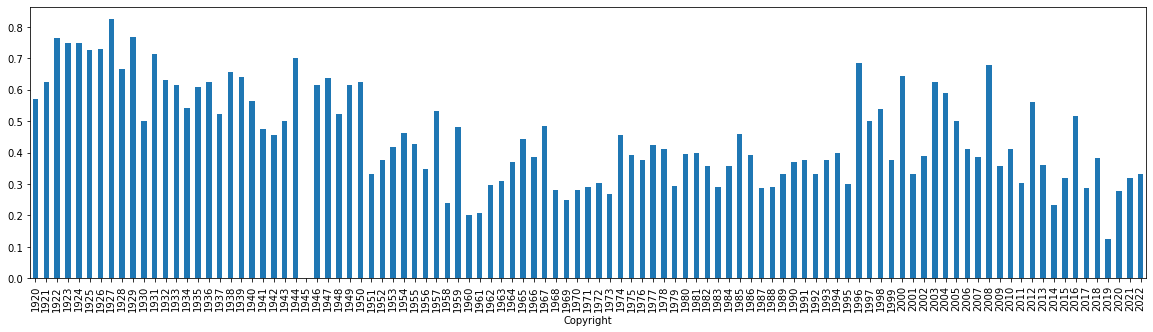

In [140]:
pd.Series(reziehcf[reziehcf["Město narození"] == "Praha"].groupby("Copyright")["Film"].nunique() / reziehcf[reziehcf["Stát narození"].str.strip().isin(["Československo","Rakousko-Uhersko","Česká republika"])].groupby("Copyright")["Film"].nunique()).plot.bar(figsize=(20,5))

<Axes: xlabel='Copyright'>

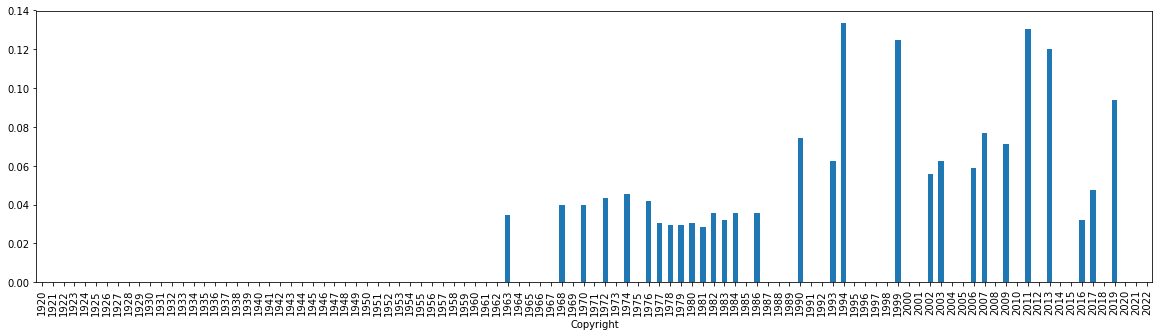

In [141]:
pd.Series(reziehcf[reziehcf["Město narození"] == "Bratislava"].groupby("Copyright")["Film"].nunique() / reziehcf[reziehcf["Stát narození"].str.strip().isin(["Československo","Rakousko-Uhersko","Česká republika"])].groupby("Copyright")["Film"].nunique()).plot.bar(figsize=(20,5))

## Slováctvo

In [142]:
profese = seznamy["profese"]

In [143]:
def plose_jednoduse(x):
    seznam = []
    for y in x:
        if y == None:
            pass
        if isinstance(y, str):
            if y not in seznam:
                seznam.append(y)
        if isinstance(y, list):
            for z in y:
                if z not in seznam:
                    seznam.append(z)
    return(seznam)

In [144]:
df["Lidé"] = df[profese].values.tolist()
df["Lidé"] = df["Lidé"].apply(lambda x: plose_jednoduse(x))

In [145]:
slovaci = df.explode("Lidé")

In [146]:
slovaci = slovaci.merge(persony, left_on="Lidé", right_on="Jméno")

<Axes: xlabel='Copyright'>

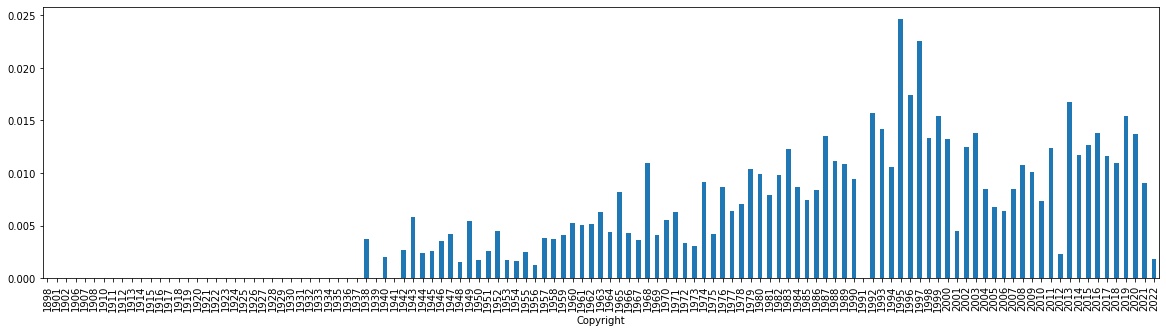

In [147]:
pd.Series(slovaci[slovaci["Město narození"] == "Bratislava"].groupby("Copyright")["Lidé"].nunique() / slovaci.groupby("Copyright")["Lidé"].nunique()).plot.bar(figsize=(20,5))

In [148]:
slovaci = slovaci.merge

## Kolik filmů spískal Státní fond kinematografie?

In [149]:
podpora = hcf.explode("S podporou")

In [150]:
podpora[podpora["Copyright"] >= 1998].groupby("S podporou")["Film"].nunique().nlargest(15)

S podporou
Státní fond České republiky pro podporu a rozvoj české kinematografie (90421)    193
Státní fond kinematografie (124966)                                              192
Audiovizuálny fond (123056)                                                       84
Ministerstvo kultúry Slovenskej republiky (113236)                                56
Media Programme EU (123258)                                                       50
Program podpory filmového průmyslu (123266)                                       42
Eurimages (107036)                                                                38
Filmová nadace (103156)                                                           14
Polski Instytut Sztuki Filmowej (114937)                                          12
Magistrát hlavního města Prahy (99476)                                            10
Ministerstvo kultury České republiky (92178)                                      10
Jihomoravský filmový nadační fond (110676)            

<Axes: xlabel='Copyright'>

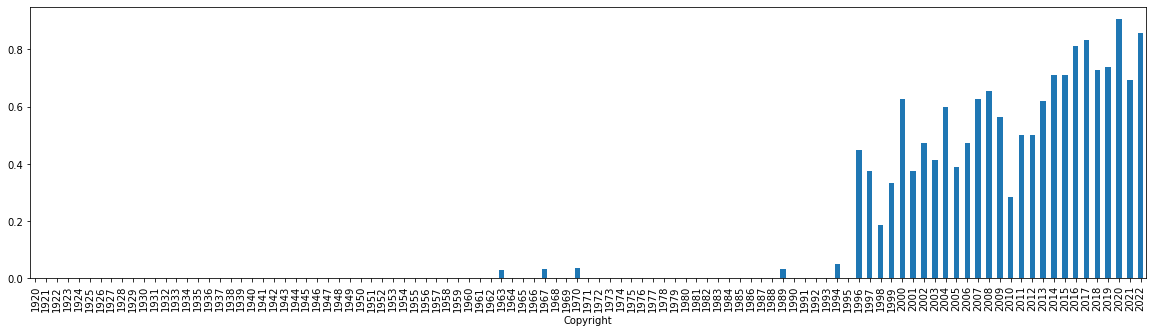

In [151]:
pd.Series(podpora[podpora["S podporou"].isin(["Státní fond kinematografie (124966)","Státní fond České republiky pro podporu a rozvoj české kinematografie (90421)"])].groupby("Copyright")["Film"].nunique() / podpora.groupby("Copyright")["Film"].nunique()).plot.bar(figsize=(20,5))

<Axes: xlabel='Copyright'>

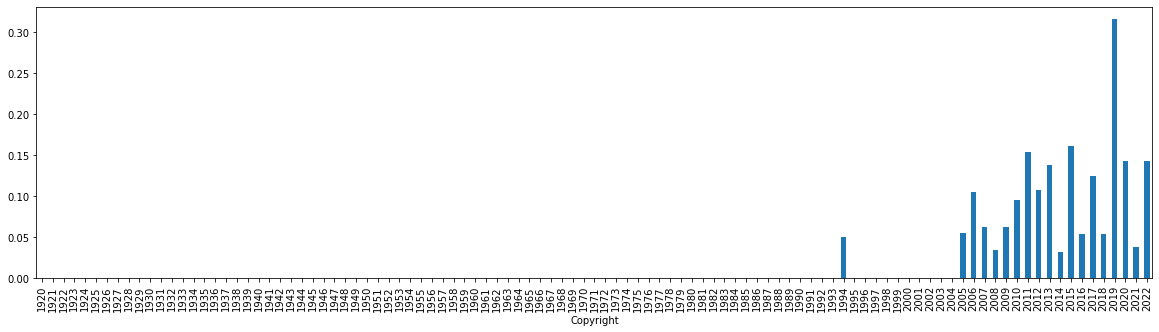

In [152]:
pd.Series(podpora[podpora["S podporou"] == "Media Programme EU (123258)"].groupby("Copyright")["Film"].nunique() / podpora.groupby("Copyright")["Film"].nunique()).plot.bar(figsize=(20,5))